<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/Preprocessing_atv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Processamento de Dados

O tutorial a seguir contém exemplos de Python para pré-processamento de dados. O pré-processamento de dados consiste em um amplo conjunto de técnicas para limpar, selecionar e transformar dados para melhorar a análise de mineração de dados. Leia atentamente as instruções passo a passo abaixo. Para executar o código, clique na célula correspondente e pressione as teclas SHIFT-ENTER simultaneamente.

## Problemas de qualidade de dados

A má qualidade dos dados pode ter um efeito adverso na mineração de dados. Entre os problemas comuns de qualidade de dados incluem ruído, valores discrepantes, valores ausentes e dados duplicados. Esta seção apresenta exemplos de código Python para aliviar alguns desses problemas de qualidade de dados. Começamos com um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI contendo informações sobre pacientes com câncer de mama. Primeiro faremos o download do conjunto de dados usando a função read_csv() do Pandas e exibiremos uma amostra com as primeiras 5 instâncias.

**<font color="red">Code:</font>**

In [ ]:
import pandas as pd
# Baixe o arquivo breast-cancer-wisconsin.data e transforme-o em um dataframe. Salve esse dataframe na variável data 
# Link do arquivo 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

data = # código aqui

In [ ]:

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data.head()

In [ ]:
# Remova a coluna 'Sample code' do dataset 
data = # código aqui

In [ ]:
# obtenha a quantidade de instâncias e armazene na variável instances
instances = # código aqui

In [ ]:
# obtenha a quantidade de atributos e amrmazene na variável atributes
atributes = # código aqui

In [ ]:
print('Número de instâncias  = %d' % (instances))
print('Número de atributos = %d' % (atributes))

## Valores ausentes

Não é incomum que um objeto esteja faltando um ou mais valores de atributo. Em alguns casos, as informações não foram coletadas; enquanto em outros casos, alguns atributos são inaplicáveis às instâncias de dados. Esta seção apresenta exemplos sobre as diferentes abordagens para lidar com valores ausentes.

De acordo com a descrição dos dados (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), os valores ausentes são codificados como '?' nos dados originais. Nossa primeira tarefa é converter os valores ausentes em NaNs. Podemos então contar o número de valores ausentes em cada coluna dos dados.
**<font color="red">Code:</font>**

In [ ]:
import numpy as np
data = data.replace('?',np.NaN)

In [ ]:
# Imprima a quantidade de dados ausentes por coluna. Salve na variável ausentes_col a quantidade de ausentes da coluna atual (iteração do for).
print('Número de valores ausentes:')
for col in data.columns:
  ausentes_col = # código aqui
  print('\t%s: %d' % (col, ausentes_col))

Observe que apenas a coluna 'Bare Nuclei' contém valores ausentes. No exemplo a seguir, os valores ausentes na coluna 'Bare Nuclei' são substituídos pelo valor mediano dessa coluna. Os valores antes e depois da substituição são mostrados para um subconjunto dos pontos de dados.

**<font color="red">Code:</font>**

In [ ]:
# Como vimos anteriormente, a único atributo que possui dados ausentes é a 'Bare Nuclei'. 
# Obtenha todos os valores desse atributo e armazene na variável data2

data2 = #código aqui

Agora vamos visualizar uma fatia desses dados. 

In [ ]:

print('Antes de substituir valores ausentes:')
print(data2[20:25])

Podemos ver que há dados ausentes nessa fatia. Vamos 'inputar' novos dados onde for ausentes. No exemplo abaixo vamos usar a mediana da coluna para substituir os dados que são ausentes. 

In [ ]:
# Preencha os dados ausentes com a mediana da coluna. 
data2 = # Código aqui

In [ ]:
print('\nDepois de substituir os valores ausentes:')
print(data2[20:25])

Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função do pandas de remoção de dados ausentes no dataFrame.

**<font color="red">Code:</font>**

In [ ]:
print('Número de linhas nos dados originais = %d' % (data.shape[0]))

In [ ]:
#Remova todas as instâncias do dataset 'data' que possuam algum atributo com dado ausente e salve o resultado em 'data2'. 
data2 = # código aqui

In [ ]:
print('Número de linhas após descartar valores ausentes = %d' % (data2.shape[0]))

## Outliers

Outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de dados. No código de exemplo abaixo, desenharemos um boxplot para identificar as colunas na tabela que contêm valores discrepantes. Observe que os valores em todas as colunas (exceto para 'Bare Nuclei') são originalmente armazenados como 'int64' enquanto os valores na coluna 'Bare Nuclei' são armazenados como objetos string (já que a coluna inicialmente contém strings como '?' representando valores ausentes). Assim, devemos primeiro converter a coluna em valores numéricos antes de criar o boxplot. Caso contrário, a coluna não será exibida ao desenhar o boxplot.

**<font color="red">Code:</font>**

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

Note que na figura alguns boxplots possuem círculos na parte superior (poderia ser na inferior também). Isso significa que esses dados fogem do padrão. Os dados 'normais' (que não são outliers) estão dentro dos limites do boxplot. 

Os boxplots sugerem que apenas 5 das colunas (Marginal Adhesion, Single Epithelial Cell Size, Bland Chromatin, Normal Nuceoli e Mitoses) contêm valores anormalmente altos (outliers). Para descartar os outliers, podemos calcular o Z-score para cada atributo e remover as instâncias que contêm atributos com Z-score anormalmente alto ou baixo (por exemplo, se Z > 3 ou Z <= -3).

**<font color="red">Code:</font>**

O código a seguir mostra os resultados da padronização das colunas dos dados. Observe que os valores omissos (NaN) não são afetados pelo processo de padronização.

In [ ]:
# Calcule o Z-Score para o dataset armazenado na variável 'data2' e armazene na variável Z  
Z = #código aqui

In [ ]:
Z[20:25]

**<font color="red">Code:</font>**

O código a seguir mostra os resultados do descarte de colunas com Z > 3 ou Z <= -3.

In [ ]:
print('Número de linhas antes de descartar valores discrepantes = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Número de linhas depois de descartar valores discrepantes = %d' % (Z2.shape[0]))

In [ ]:
Z2.describe()

## Dados duplicados

Alguns conjuntos de dados, especialmente aqueles obtidos pela mesclagem de várias fontes de dados, podem conter duplicatas ou instâncias quase duplicadas. O termo desduplicação é frequentemente usado para se referir ao processo de lidar com problemas de dados duplicados.

**<font color="red">Code:</font>**

No exemplo a seguir, primeiro verificamos se há instâncias duplicadas no conjunto de dados de câncer de mama.

In [ ]:
# Calcule a quantidade de dados duplicados no dataset salvo na variável 'data'
dups = # código aqui

In [ ]:
print('Número de linhas duplicadas = %d' % (dups.sum()))

In [ ]:
data.loc[[11,28]]

A função utilizada retornará uma matriz booleana que indica se cada linha é uma duplicata de uma linha anterior na tabela. Os resultados sugerem que há 236 linhas duplicadas no conjunto de dados de câncer de mama. Por exemplo, a instância com índice de linha 11 tem valores de atributo idênticos à instância com índice de linha 28. Embora essas linhas duplicadas possam corresponder a amostras de indivíduos diferentes, neste exemplo hipotético, assumimos que as duplicatas são amostras retiradas do mesmo indivíduo e ilustre abaixo como remover as linhas duplicadas.

**<font color="red">Code:</font>**

In [ ]:
print('Número de linhas antes de descartar duplicatas = %d' % (data.shape[0]))

In [ ]:
# Remova as instâncias de dados duplicados do dataset definido na variável 'data' e salve o novo dataset na variável 'data2'
data2 = # código aqui

In [ ]:
print('Número de linhas depois de descartar duplicatass = %d' % (data2.shape[0]))

## Agregação

A agregação de dados é uma tarefa de pré-processamento em que os valores de dois ou mais objetos são combinados em um único objeto. A motivação para a agregação inclui (1) reduzir o tamanho dos dados a serem processados, (2) alterar a granularidade da análise (de escala fina para escala mais grossa) e (3) melhorar a estabilidade dos dados.

No exemplo abaixo, usaremos os dados da série temporal diária de precipitação para uma estação meteorológica localizada no Detroit Metro Airport. Os dados brutos foram obtidos do site Climate Data Online (https://www.ncdc.noaa.gov/cdo-web/). A série temporal diária de precipitação será comparada com seus valores mensais..

**<font color="red">Code:</font>**

O código abaixo carregará os dados da série temporal de precipitação e desenhará um gráfico de linha de sua série temporal diária.

In [ ]:
daily = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])

In [ ]:
# Obtenha apenas os dados da coluna 'PRCP' do dataset definido na variável 'PRCP'
daily = # código aqui
daily

In [ ]:
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Precipitação Diária (variância = %.4f)' % (daily.var()))

Observe que as séries temporais diárias parecem ser bastante caóticas e variam significativamente de um passo de tempo para outro. As séries temporais podem ser agrupadas e agregadas por mês para obter os valores totais mensais de precipitação. A série temporal resultante parece variar mais suavemente em comparação com a série temporal diária.

**<font color="red">Code:</font>**

In [ ]:
# Agrupe agora usando o 'Pandas.Grouper' os dados diários em dados mensais. Ver parâmetro 'freq' de Pandas.Grouper. 
group = # código aqui
monthly = daily.groupby(group).sum()
monthly

In [ ]:
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Precipitação Mensal (variância = %.4f)' % (monthly.var()))

No exemplo abaixo, as séries temporais de precipitação diária são agrupadas e agregadas por ano para obter os valores anuais de precipitação.

**<font color="red">Code:</font>**

In [ ]:
# Agrupe agora usando o 'Pandas.Grouper' e 'Pandas.groupby' os dados diários em dados anualmente. Ver parâmetro 'freq' de Pandas.Grouper. 
annual = # código aqui
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Precipitação Anual (variância = %.4f)' % (annual.var()))

## Amostragem

A amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise exploratória de dados e ampliação de algoritmos para aplicativos de big data e (2) quantificar incertezas devido a distribuições de dados variáveis. Existem vários métodos disponíveis para amostragem de dados, como amostragem sem reposição, onde cada instância selecionada é removida do conjunto de dados, e amostragem com reposição, onde cada instância selecionada não é removida, permitindo assim que seja selecionada mais de uma vez na amostra .

No exemplo abaixo, aplicaremos a amostragem com substituição e sem substituição ao conjunto de dados de câncer de mama obtido do repositório de aprendizado de máquina da UCI.

**<font color="red">Code:</font>**

Inicialmente exibimos os primeiros cinco registros da tabela.

In [ ]:
data.head()

No código a seguir, uma amostra de tamanho 3 é selecionada aleatoriamente (sem reposição) dos dados originais.

**<font color="red">Code:</font>**

In [ ]:
# Obtenha 3 amostra usando uma amostragem simples sem reposição (ou substituição) 
sample = # código aqui
sample

No próximo exemplo, selecionamos aleatoriamente 1% dos dados (sem substituição) e exibimos as amostras selecionadas. O argumento random_state da função especifica o valor inicial do gerador de números aleatórios.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

Agora realizaremos uma amostragem com reposição para criar uma amostra cujo tamanho seja igual a 1% de todos os dados. Você deve ser capaz de observar instâncias duplicadas na amostra aumentando o tamanho da amostra.

**<font color="red">Code:</font>**

In [ ]:
# Calcule uma amostragem de 1% com reposição usando o random_state igual a 1. 
sample = # código aqui
sample

Por fim, realize uma amostragem estratificada mantendo a propoção das classes. Primeiro calcule a proporção das classes 

In [ ]:
import seaborn as sns
data['Class'].value_counts()/data['Class'].count() # divisão das classes

Agora pege uma amostra com **20** instâncias mantendo a proporção inicial entre as classes.

In [ ]:
# Obtenha 20 amostras mantendo a proporção (estratificada) das classes. 
# Armazene as amostras na variável 'amostra_estratificada'
tamanho_amostra = 20

#
# Código AQUI 
#

amostra_estratificada

Por fim, cheque se a amostra estratificada mantem a mesma proporção inicial.

In [ ]:
amostra_estratificada['Class'].value_counts()/amostra_estratificada['Class'].count() # divisão das classes

## Discretização

A discretização é uma etapa de pré-processamento de dados que geralmente é usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos de discretização não supervisionados simples, mas amplamente utilizados (largura igual e profundidade igual) aplicados ao atributo 'Glump Thickness' do conjunto de dados de câncer de mama.

Primeiro, traçamos um histograma que mostra a distribuição dos valores dos atributos. A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

**<font color="red">Code:</font>**

In [ ]:
col_name = 'Clump Thickness'
data[col_name].hist(bins=10)
data[col_name].value_counts(sort=False)

Para o método de largura igual, podemos aplicar uma função do pandas para discretizar o atributo em 4 caixas de larguras de intervalo semelhantes. Depois, a função value_counts() pode ser usada para determinar o número de instâncias em cada bin.

**<font color="red">Code:</font>**

In [ ]:
# Discretize os atributos da coluna 'Clump Thickness' em 4 faixas e salve-os em na variável 'bin'
bins = # código aqui

bins.value_counts(sort=False)

Para o método de frequência igual, a função qcut() pode ser usada para particionar os valores em 4 compartimentos, de modo que cada compartimento tenha quase o mesmo número de instâncias.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.qcut(data[col_name], 4)
bins.value_counts(sort=False)

## Principal Component Analysis

A análise de componentes principais (PCA) é um método clássico para reduzir o número de atributos nos dados, projetando os dados de seu espaço original de alta dimensão em um espaço de dimensão inferior. Os novos atributos (também conhecidos como componentes) criados pelo PCA têm as seguintes propriedades: (1) são combinações lineares dos atributos originais, (2) são ortogonais (perpendiculares) entre si e (3) capturam o máximo quantidade de variação nos dados.

O exemplo abaixo ilustra a aplicação do PCA a um conjunto de dados de imagem. Existem 16 arquivos RGB, cada um com um tamanho de 111 x 111 pixels. O código de exemplo abaixo lerá cada arquivo de imagem e converterá a imagem RGB em valores de recurso de 111 x 111 x 3 = 36963. Isso criará uma matriz de dados de tamanho 16 x 36963.

**<font color="red">Code:</font>**

Como preparação do código que será executado, você precisar fazer um upload de um conjunto de imagens que estão disponíveis no arquivo 'pics.zip' (https://github.com/rodrigoclira/mineracao-dados/raw/main/datasets/pics.zip). 

Após baixá-lo, clique na aba lateral do colab e faça o upload, como indicado na imagem abaixo. (1) aba de arquivos, (2) ação de upload, (3) arquivo 'pic.zip' no colab. Certifique-se que o 'pics.zip' esteja aparecendo. Ao lado do botão upload tem um botão de 'refresh' para atualização da exibição dos arquivos que estão disponíveis. Só execute o comando de 'unzip' quando o pacote de zipado estiver disponível. 


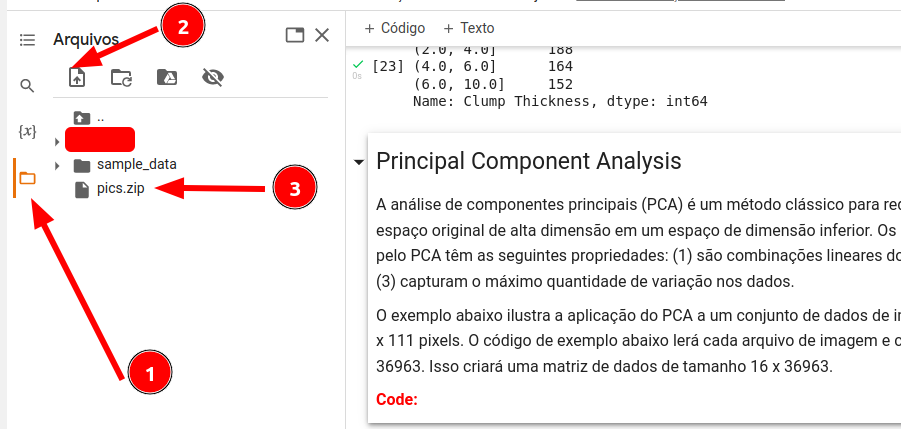

In [ ]:
!unzip pics.zip

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [ ]:
imgData


Usando PCA, a matriz de dados é projetada para seus dois (**2**) primeiros componentes principais. Os valores projetados dos dados da imagem original são armazenados em um objeto DataFrame do pandas chamado projected.

**<font color="red">Code:</font>**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Implemente um PCA que irá extarir os dois componentes principais que representam
# os dados contidos na variável imgData. Esses dois componentes devem ser armazenados
# na variável 'projected'
numComponents = 2

#
# PCA AQUI
#

# Armazenar os dados projetos em projected 
projected = # código aqui

In [ ]:
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))

# Definindo as classes
projected['food'] = ['burger', 'burger', 'burger', 'burger', 'drink', 'drink', 'drink', 'drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

Por fim, desenhamos um gráfico de dispersão para exibir os valores projetados. Observe que as imagens de hambúrgueres, bebidas e massas são todas projetadas para a mesma região. No entanto, as imagens de frango frito (mostradas como quadrados pretos no diagrama) são mais difíceis de discriminar.

**<font color="red">Code:</font>**

In [ ]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

## Resumo

Este tutorial apresenta exemplos de programação Python para pré-processamento de dados, incluindo limpeza de dados (para lidar com valores ausentes e remover valores discrepantes, bem como dados duplicados), agregação, amostragem, discretização e redução de dimensionalidade usando análise de componentes principais.

**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 